<a href="https://colab.research.google.com/github/Nadia365/temperature_data_viz/blob/main/TemperatureVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We download data form http://berkeleyearth.org/data/
Overview of datasets:


In [ ]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Choropleth Map with Plotly
!pip install plotly
import plotly
import plotly.express as px
import math
import cufflinks as cf
import plotly.graph_objects as go
%matplotlib inline

#from plotly.offline import plot, iplot, init_notebook_mode
#import plotly.graph_objs as go
#init_notebook_mode(connected=True)
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)
#cf.go_offline()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [ ]:
# read a file
gdrive_path = '/content/drive/MyDrive/'


In [ ]:
#List of the content of a folder
import glob            # for file locations
import pprint          # for pretty printing
import re

pp = pprint.PrettyPrinter()

def file_list(folder_path, output=False):
    # create an empty list
    file_list = []
    # for file name in the folder path...
    for filename in glob.glob(folder_path):
        # ... append it to the list
        file_list.append(filename)

    # sort alphabetically
    file_list.sort()

    # Output
    if output:
        print(str(len(file_list)) + " files found")
        pp.pprint(file_list)

    return file_list

File_list=file_list(f'{gdrive_path}CleanTemperatureData/*.csv', output=True);


4 files found
['/content/drive/MyDrive/CleanTemperatureData/GlobalLandTemperaturesByCountry.csv',
 '/content/drive/MyDrive/CleanTemperatureData/GlobalLandTemperaturesByMajorCity.csv',
 '/content/drive/MyDrive/CleanTemperatureData/GlobalLandTemperaturesByState.csv',
 '/content/drive/MyDrive/CleanTemperatureData/GlobalTemperatures.csv']


In [ ]:
# read in the GlobalLandTemperaturesByCountry datafile
data = pd.read_csv(File_list[0])
data

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [ ]:
# read in the GlobalLandTemperaturesByMajorCity datafile
data = pd.read_csv(File_list[1])
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [ ]:
# read in the Global temperature by State  datafile
data = pd.read_csv(File_list[2])
data

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [ ]:
# read in the Global temperature datafile
data = pd.read_csv(File_list[3])
data

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [ ]:
#Number of rows and columns
print ('data columns number is :', data.shape[1], 'data rows number is: ', data.shape[0])

data columns number is : 9 data rows number is:  59620


In [ ]:
#Data types
data.dtypes

Country                 object
Code                    object
Calling Code            object
Year                     int64
CO2 emission (Tons)    float64
Population(2022)       float64
Area                   float64
% of World              object
Density(km2)            object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59620 entries, 0 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              59620 non-null  object 
 1   Code                 57452 non-null  object 
 2   Calling Code         56097 non-null  object 
 3   Year                 59620 non-null  int64  
 4   CO2 emission (Tons)  59620 non-null  float64
 5   Population(2022)     53116 non-null  float64
 6   Area                 55284 non-null  float64
 7   % of World           55284 non-null  object 
 8   Density(km2)         53116 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 4.1+ MB


In [ ]:
#Check missing vlaues
data.isnull().sum()

Country                   0
Code                   2168
Calling Code           3523
Year                      0
CO2 emission (Tons)       0
Population(2022)       6504
Area                   4336
% of World             4336
Density(km2)           6504
dtype: int64

In [ ]:
#Percentage of missing values
(data.isnull().sum()/data.shape[0])*100

Country                 0.000000
Code                    3.636364
Calling Code            5.909091
Year                    0.000000
CO2 emission (Tons)     0.000000
Population(2022)       10.909091
Area                    7.272727
% of World              7.272727
Density(km2)           10.909091
dtype: float64

In [ ]:
data[data['Code'].isnull()]['Country'].unique()

array(['Namibia', 'Reunion', 'Russia', 'Saint Helena', 'South Korea',
       'Syria', 'Taiwan', 'Tanzania'], dtype=object)

In [ ]:
#Feature Engineering :
#Repalce missing values
#Adding continents to the data
data[data['Code'].isnull()]['Country'].unique()
dict1={"Namibia":"Namibia",
      "Reunion":"Réunion",
      "Russia":"Russian Federation",
      "Saint Helena":"Saint Helena, Ascension and Tristan da Cunha",
      "South Korea": "Korea (Democratic People's Republic of)",
      "Syria":"Syrian Arab Republic",
      "Taiwan":"Taiwan, Province of China" ,
      "Tanzania":"Tanzania, United Republic of"}
dict2=['NA','RE','RU','SH', 'KR','SY','TN' ,'TZ']
data['Country']=data['Country'].replace(dict1)

In [ ]:
data[data['Country']=='Namibia']

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
36585,Namibia,NaN,264,1750,0.0,2567012.0,825615.0,0.60%,3/km²
36586,Namibia,NaN,264,1751,0.0,2567012.0,825615.0,0.60%,3/km²
36587,Namibia,NaN,264,1752,0.0,2567012.0,825615.0,0.60%,3/km²
36588,Namibia,NaN,264,1753,0.0,2567012.0,825615.0,0.60%,3/km²
36589,Namibia,NaN,264,1754,0.0,2567012.0,825615.0,0.60%,3/km²
...,...,...,...,...,...,...,...,...,...
36851,Namibia,NaN,264,2016,59786960.0,2567012.0,825615.0,0.60%,3/km²
36852,Namibia,NaN,264,2017,64003113.0,2567012.0,825615.0,0.60%,3/km²
36853,Namibia,NaN,264,2018,68080034.0,2567012.0,825615.0,0.60%,3/km²
36854,Namibia,NaN,264,2019,72162043.0,2567012.0,825615.0,0.60%,3/km²


In [ ]:
#The dataset is missing the region information, so we tried to add
#the region corresponding to each country
for index, i in enumerate(data[data['Code'].isnull()]['Country'].unique()):
 # print(index)
 # print(i)
 # print(dict2[index])
 # print(data[data['Country']==i]['Code'])
  data['Code'] = np.where(data['Country']==i, dict2[index], data['Code'])

In [ ]:
#Add continent information to dataset
# Read the dataset into a data frame
df_inf = pd.read_csv('/content/all.csv', usecols=["alpha-2", "region", "sub-region"])

# Rename the column of data frame
df_inf.rename(columns={'alpha-2':'Code', 'region':'Region', 'sub-region':'Sub-Region'}, inplace=True)

# Have a look at the data frame
df_inf.head()

,Code,Region,Sub-Region
0,AF,Asia,Southern Asia
1,AX,Europe,Northern Europe
2,AL,Europe,Southern Europe
3,DZ,Africa,Northern Africa
4,AS,Oceania,Polynesia


In [ ]:
#Merge two datasets to have extended region information for all countries
data_merged = pd.merge(data, df_inf, how='left', on='Code')

data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59620 entries, 0 to 59619
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              59620 non-null  object 
 1   Code                 59620 non-null  object 
 2   Calling Code         56097 non-null  object 
 3   Year                 59620 non-null  int64  
 4   CO2 emission (Tons)  59620 non-null  float64
 5   Population(2022)     53116 non-null  float64
 6   Area                 55284 non-null  float64
 7   % of World           55284 non-null  object 
 8   Density(km2)         53116 non-null  object 
 9   Region               58807 non-null  object 
 10  Sub-Region           58807 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 5.5+ MB


In [ ]:
new_dat=data_merged

In [ ]:
new_dat

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2),Region,Sub-Region
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km²,Asia,Southern Asia
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km²,Asia,Southern Asia
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km²,Asia,Southern Asia
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km²,Asia,Southern Asia
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km²,Asia,Southern Asia
...,...,...,...,...,...,...,...,...,...,...,...
59615,Zimbabwe,ZW,263,2016,736467042.0,16320537.0,390757.0,0.30%,42/km²,Africa,Sub-Saharan Africa
59616,Zimbabwe,ZW,263,2017,746048675.0,16320537.0,390757.0,0.30%,42/km²,Africa,Sub-Saharan Africa
59617,Zimbabwe,ZW,263,2018,757903042.0,16320537.0,390757.0,0.30%,42/km²,Africa,Sub-Saharan Africa
59618,Zimbabwe,ZW,263,2019,768852126.0,16320537.0,390757.0,0.30%,42/km²,Africa,Sub-Saharan Africa


In [ ]:
new_dat.isnull().sum()

Country                   0
Code                      0
Calling Code           3523
Year                      0
CO2 emission (Tons)       0
Population(2022)       6504
Area                   4336
% of World             4336
Density(km2)           6504
Region                  813
Sub-Region              813
dtype: int64

Dashboard to visualize the following :

- Plot a simple line graph of Global Cumulative CO2 Emission over the years

- Create a Bar Graph of Top 20 Countries with highest CO2 Emission in 2020

- Time series of cumulative CO2 emission of top 5 countries

- Comparison Graph of Top 5 countries for 2020

- Top 10 cumulative CO2 emission per person in 2020

- Create Plotly Choropleth Map with Years animated on X-axis and CO2 Emission on Y-axis to show world CO2 emission through years on world map

o   Show the same for Africa, Europe, Russia, and USA


In [ ]:
# Let's plot simple line graph of Global Cumulative CO2 Emission over the years

In [ ]:
dict3=['Antarctica','Europe','Africa']
for index, i in enumerate(new_dat[new_dat['Region'].isnull()]['Country'].unique()):
   #print(index)
  #print(i)
  #print(dict3[index])
  #print(new_dat[new_dat['Country']==i]['Region'])
  new_dat['Region'] = np.where(new_dat['Country']==i, dict3[index], new_dat['Region'])

In [ ]:
#Plot a simple line graph of Global CO2 Emission over the years
data_per_year=new_dat.groupby('Year')['CO2 emission (Tons)'].sum()

# Create a data frame from the resulting series
df_total_year = pd.DataFrame(data_per_year)

# Resulting data frame will have Year column as index
# We should reset the index to convert it into columns
df_total_year.reset_index(level=0, inplace=True)

# Plot the choropleth map figure
fig = px.area(df_total_year,
              x="Year",
              y="CO2 emission (Tons)",
              hover_name = 'Year',
              hover_data=['Year','CO2 emission (Tons)'],
              #color='Entity',
              labels={'Year':'Year','CO2 emission (Tons)':'CO₂ Emission'},
              height=600)

# Update the title and adjust its location
fig.update_layout(title="Change in CO₂ Emission Between Years 1750 and 2020",
                  title_x=0.50)

# Remove the legend
fig.update_layout(showlegend = False)

# Make background transparent
# fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)', 'paper_bgcolor': 'rgba(0, 0, 0, 0)'})

# Show color scale axis
fig.update(layout_coloraxis_showscale = True)

# Show the figure
fig.show()

In [ ]:
#Plot a simple line graph of Global CO2 Emission over the years
#Plot a simple line graph of Global CO2 Emission over the years
CO2_cum=new_dat.groupby('Year')['CO2 emission (Tons)'].sum().transform(pd.Series.cumsum)

# Create a data frame from the resulting series
CO2_cum = pd.DataFrame(CO2_cum)

# Resulting data frame will have Year column as index
# We should reset the index to convert it into columns
CO2_cum.reset_index(level=0, inplace=True)

# Plot the choropleth map figure
fig = px.area(CO2_cum,
              x="Year",
              y="CO2 emission (Tons)",
              hover_name = 'Year',
              hover_data=['Year','CO2 emission (Tons)'],
              #color='Entity',
              labels={'Year':'Year','CO2 emission (Tons)':'CO₂ Emission'},
              height=600)

# Update the title and adjust its location
fig.update_layout(title="Cumulative  CO₂ Emission Between Years 1750 and 2020",
                  title_x=0.50)

# Remove the legend
fig.update_layout(showlegend = False)

# Make background transparent
# fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)', 'paper_bgcolor': 'rgba(0, 0, 0, 0)'})

# Show color scale axis
fig.update(layout_coloraxis_showscale = True)

# Show the figure
fig.show()

In [ ]:
CO2_cum

,Year,CO2 emission (Tons)
0,1750,9.350528e+06
1,1751,2.805158e+07
2,1752,5.610683e+07
3,1753,9.351627e+07
4,1754,1.402836e+08
...,...,...
266,2016,5.528645e+13
267,2017,5.683465e+13
268,2018,5.841888e+13
269,2019,6.003912e+13


In [ ]:
#Create a Bar Graph of Top 20 Countries with highest CO2 Emission in 2020
# Sort data frame by total CO2 emission
df_merged_y = new_dat[new_dat['Year']==2020].sort_values('CO2 emission (Tons)', ascending = False)

# Select first 20 rows
df_total_sorted = df_merged_y.iloc[0:19,:]

# Plot the bar figure
fig = px.bar(df_total_sorted,
              x = 'Country',
              y = 'CO2 emission (Tons)',
              color='CO2 emission (Tons)',
              hover_name = 'Country',
              hover_data = ['CO2 emission (Tons)'],
              color_continuous_scale = 'Peach',
              labels={'Country':'Country','CO2 emission (Tons)':'Total CO₂ Emission'},
              height=500)

# Adjust text label size & angle and the title
fig.update_layout(uniformtext_minsize = 15,
                  xaxis_tickangle = -45,
                  title = 'Total CO₂ Emission Between Years 1750 and 2017 - Top 20 Countries',
                  title_x = 0.5)

# Make background transparent
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)', 'paper_bgcolor': 'rgba(0, 0, 0, 0)'})

# Hide color scale axis
fig.update(layout_coloraxis_showscale=False)

# Show the figure
fig.show()

In [ ]:
df_merged_y

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2),Region,Sub-Region
57180,United States,US,1,2020,4.170000e+11,3.382899e+08,9372610.0,6.10%,36/km²,Americas,Northern America
10839,China,CN,86,2020,2.360000e+11,1.425887e+09,9706961.0,6.30%,147/km²,Asia,Eastern Asia
44443,Russian Federation,RU,7,2020,1.150000e+11,1.447133e+08,17098242.0,11.00%,8/km²,Europe,Eastern Europe
20324,Germany,DE,49,2020,9.263562e+10,8.336984e+07,357114.0,0.20%,233/km²,Europe,Western Europe
56909,United Kingdom,GB,44,2020,7.816115e+10,6.750894e+07,242900.0,0.20%,278/km²,Europe,Northern Europe
...,...,...,...,...,...,...,...,...,...,...,...
44985,"Saint Helena, Ascension and Tristan da Cunha",SH,290,2020,3.792950e+05,NaN,394.0,0.00%,NaN,Africa,Sub-Saharan Africa
39294,Niue,NU,683,2020,2.901480e+05,NaN,260.0,0.00%,NaN,Oceania,Polynesia
55825,Tuvalu,TV,688,2020,2.789250e+05,1.131200e+04,26.0,0.00%,435/km²,Oceania,Polynesia
43359,Puerto Rico,PR,"1-787, 1-939",2020,2.088480e+05,3.252407e+06,8870.0,0.00%,367/km²,Americas,Latin America and the Caribbean


In [ ]:
#Time series of cumulative CO2 emission of top 5 countries
CO2_cum_country=new_dat.sort_values(['Year', 'Country'],ascending=[True, True] )
# Create a Year Only column and convert it to integer type to use it in the animation frame
#CO2_cum_country['Year Only'] = pd.DatetimeIndex(CO2_cum_country['Year']).year
#CO2_cum_country['Year'].astype('int')
# Create an aggregated column for CO2 emission with cumsum()
CO2_cum_country['Cumulative CO2 Emission'] = CO2_cum_country.groupby('Country')['CO2 emission (Tons)'].transform(pd.Series.cumsum)

# Sort the data frame again for the animated map plot
CO2_cum_country_new = CO2_cum_country.sort_values('Year', ascending = True)
country_list=CO2_cum_country_new[CO2_cum_country_new['Year']==2020].sort_values('Cumulative CO2 Emission', ascending=False)['Country'][:5]
CO2_cum_country_new1=CO2_cum_country_new[CO2_cum_country_new['Country'].isin(country_list.values)]
#List of top five countires with the highest cumulative Co2 emission
#CO2_cum_country_new[CO2_cum_country_new['Year']=='2020'].sort('Cumulative CO2 Emission', ascending=True)
# Plot the animated choropleth map figure
# Plot the choropleth map figure
fig = px.line(CO2_cum_country_new1,
              x="Year",
              y="Cumulative CO2 Emission",
              hover_name = 'Country',
              hover_data=['Country','Cumulative CO2 Emission'],
              color='Country',
              labels={'Country':'Country','Cumulative CO2 Emission':'Cumulative CO₂ Emission'},
              height=600)

# Update the title and adjust its location
fig.update_layout(title="Cumulative CO₂ Emission Between Years 1750 and 2020 - Countries",
                  title_x=0.50)


fig.update_layout(showlegend = True)

# Make background transparent
# fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)', 'paper_bgcolor': 'rgba(0, 0, 0, 0)'})

# Show color scale axis
fig.update(layout_coloraxis_showscale = True)

# Show the figure
fig.show()

In [ ]:
#Comparison Graph of Top 5 countries for 2020
country_list=CO2_cum_country_new[CO2_cum_country_new['Year']==2020].sort_values('Cumulative CO2 Emission', ascending=False)['Country'][:5].values
country_list

array(['United States', 'United Kingdom', 'Germany', 'China',
       'Russian Federation'], dtype=object)

In [ ]:
#Top 10 cumulative CO2 emission per person in 2020
#We should first replace the null population corresponding to countries
df_pop = pd.read_csv('/content/population_by_country_2020.csv',
                     usecols=["Country (or dependency)",
                              "Population (2020)",
                              "Density (P/Km²)",
                              "Land Area (Km²)"])

# Rename the column of data frame
df_pop.rename(columns={'Country (or dependency)':'Country'}, inplace=True)

# Have a look at the data frame
print(df_pop.head())
df_all = pd.merge(data_merged, df_pop, how='left', on='Country')

# Define the dictionary
matches = {"Côte d'Ivoire":"Cote d'Ivoire",
           "DR Congo":'Democratic Republic of Republic of the Congo',
           "Congo":'Republic of the Congo',
           "Cabo Verde":'Cape Verde',
           "Curaçao":'Curacao',
           "Czech Republic (Czechia)":'Czech Republic',
           "Micronesia":'Micronesia (country)',
           "Kyrgyzstan":'Kyrgysztan',
           "Saint Kitts & Nevis":'Saint Kitts and Nevis',
           "North Macedonia":'Macedonia',
           "State of Palestine":'Palestine',
           "Réunion":'Reunion',
           "Saint Pierre & Miquelon":'Saint Pierre and Miquelon',
           "Sao Tome & Principe":'Sao Tome and Principe',
           "Sint Maarten":'Sint Maarten (Dutch part)',
           "Turks and Caicos":'Turks and Caicos Islands',
           "Timor-Leste":'Timor',
           "St. Vincent & Grenadines":'Saint Vincent and the Grenadines',
           "Wallis & Futuna":'Wallis and Futuna Islands'
          }


# Replace the country names in the population data frame
df_pop.replace({"Country": matches}, inplace=True)

# Perform the merge again
df_all = pd.merge(data_merged, df_pop, how='left', on='Country')

# Since we couldn't find the information about 4 countries and we already covered Czech Republic,
# we can drop these 5 countries
df_all.dropna(inplace=True)

# Check if they are matched
df_all.info()


         Country  Population (2020)  Density (P/Km²)  Land Area (Km²)
0          China         1440297825              153          9388211
1          India         1382345085              464          2973190
2  United States          331341050               36          9147420
3      Indonesia          274021604              151          1811570
4       Pakistan          221612785              287           770880
<class 'pandas.core.frame.DataFrame'>
Int64Index: 47967 entries, 0 to 59619
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              47967 non-null  object 
 1   Code                 47967 non-null  object 
 2   Calling Code         47967 non-null  object 
 3   Year                 47967 non-null  int64  
 4   CO2 emission (Tons)  47967 non-null  float64
 5   Population(2022)     47967 non-null  float64
 6   Area                 47967 non-null  float64
 7   % of World      

In [ ]:
#Top 10 cumulative CO2 emission per person in 2020
df_all_cum=df_all.sort_values(['Year', 'Country'],ascending=[True, True] )
# Create a Year Only column and convert it to integer type to use it in the animation frame

# Create an aggregated column for CO2 emission with cumsum()
df_all_cum['Cumulative CO2 Emission'] = CO2_cum_country.groupby('Country')['CO2 emission (Tons)'].transform(pd.Series.cumsum)

# Sort the data frame again for the animated map plot
df_all_cum = df_all_cum.sort_values('Year', ascending = True)

df_all_cum_2020=df_all_cum[df_all_cum['Year']==2020]

df_all_cum_2020['CumPer Person']=df_all_cum_2020['Cumulative CO2 Emission']/df_all_cum_2020['Population(2022)']

In [ ]:
df_all_cum_2020

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2),Region,Sub-Region,Population (2020),Density (P/Km²),Land Area (Km²),Cumulative CO2 Emission,CumPer Person
40649,Pakistan,PK,92,2020,5.162289e+09,235824862.0,881912.0,0.50%,267/km²,Asia,Southern Asia,221612785.0,287.0,770880.0,9.551340e+10,405.018368
38752,Niger,NE,227,2020,4.652334e+07,26207977.0,1267000.0,0.90%,21/km²,Africa,Sub-Saharan Africa,24346468.0,19.0,1266700.0,9.251186e+08,35.299122
39023,Nigeria,NG,234,2020,3.914991e+09,218541212.0,923768.0,0.60%,237/km²,Africa,Sub-Saharan Africa,206984347.0,226.0,910770.0,8.799022e+10,402.625294
39565,North Korea,KP,850,2020,5.049468e+09,26069416.0,120538.0,0.10%,216/km²,Asia,Eastern Asia,25798588.0,214.0,120410.0,1.787941e+11,6858.384304
40107,Norway,NO,47,2020,2.632394e+09,5434319.0,323802.0,0.20%,17/km²,Europe,Northern Europe,5428594.0,15.0,365268.0,1.040229e+11,19141.846198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21408,Grenada,GD,1-473,2020,8.262881e+06,125438.0,344.0,0.00%,365/km²,Americas,Latin America and the Caribbean,112614.0,331.0,340.0,1.607098e+08,1281.188922
21950,Guatemala,GT,502,2020,4.449311e+08,17843908.0,108889.0,0.10%,164/km²,Americas,Latin America and the Caribbean,17971382.0,167.0,107160.0,8.902918e+09,498.933217
22221,Guinea,GN,224,2020,8.623508e+07,13859341.0,245857.0,0.20%,56/km²,Africa,Sub-Saharan Africa,13191279.0,53.0,245720.0,1.924528e+09,138.861424
15175,Dominica,DM,1-767,2020,4.806990e+06,72737.0,751.0,0.00%,97/km²,Americas,Latin America and the Caribbean,72017.0,96.0,750.0,9.199167e+07,1264.716362


In [ ]:
# Plot the bar figure
fig = px.bar(df_all_cum_2020.sort_values('CumPer Person', ascending=False)[:10],
              x = 'Country',
              y = 'CumPer Person',
              color='CumPer Person',
              hover_name = 'Country',
              hover_data = ['CumPer Person'],
              color_continuous_scale = 'Peach',
              labels={'Country':'Country','CumPer Person':'Total CO₂ Emission'},
              height=500)

# Adjust text label size & angle and the title
fig.update_layout(uniformtext_minsize = 15,
                  xaxis_tickangle = -45,
                  title = 'Total CO₂ Emission Between Per person in 2020 - Top 10 Countries',
                  title_x = 0.5)

# Make background transparent
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)', 'paper_bgcolor': 'rgba(0, 0, 0, 0)'})

# Hide color scale axis
fig.update(layout_coloraxis_showscale=False)

# Show the figure
fig.show()

In [ ]:
#Create Plotly Choropleth Map with Years animated on X-axis and CO2 Emission on Y-axis to show world CO2 emission through years on world map
# Show the same for Africa, Europe, Russia, and USA
# Plot the animated choropleth map figure
fig = px.choropleth(CO2_cum_country_new[CO2_cum_country_new['Region']=='Europe'],
                    locations="Country",
                    locationmode='country names',
                    color="Cumulative CO2 Emission",
                    hover_name="Country",
                    hover_data=['Cumulative CO2 Emission'],
                    color_continuous_scale="Peach",
                    animation_frame="Year"
                   )
fig.update_layout(showlegend = True)
# Update the title and adjust its location
fig.update_layout(title="Change in Cumulative CO₂ Emission Between Years 1750 and 2020 - Countries",
                  title_x=0.5)

# Show the figure
fig.show()


In [ ]:
#Second way to do the visualization of data

In [ ]:
#Visualization

In [ ]:
#Remove missing values
#print('DataFrame after dropping the rows having missing values:')
#print(data.dropna(inplace=True))

In [ ]:
data.isnull().sum()

Country                   0
Code                      0
Calling Code           3523
Year                      0
CO2 emission (Tons)       0
Population(2022)       6504
Area                   4336
% of World             4336
Density(km2)           6504
dtype: int64

In [ ]:
#Data Exploration
#Information about data
data.describe()

,Year,CO2 emission (Tons),Population(2022),Area
count,59620.000000,5.962000e+04,5.311600e+04,5.528400e+04
mean,1885.000000,1.034774e+09,3.992260e+07,6.522073e+05
std,78.231085,1.041652e+10,1.482365e+08,1.865483e+06
min,1750.000000,0.000000e+00,1.131200e+04,2.100000e+01
25%,1817.000000,0.000000e+00,1.770414e+06,1.770450e+04
50%,1885.000000,0.000000e+00,8.673095e+06,1.103815e+05
75%,1953.000000,8.715092e+06,2.862920e+07,4.925730e+05
max,2020.000000,4.170000e+11,1.425887e+09,1.709824e+07


In [ ]:
#Categorical variables
cat=['Density(km2)', 'Country', 'Calling Code','% of World', 'Code']
#Numerical Variables
num=['CO2 emission (Tons)','Population(2022)','Area' ]
time=['Year']

In [ ]:
plt.rcParams["figure.figsize"] = [20.50, 5.50]
plt.rcParams["figure.autolayout"] = True

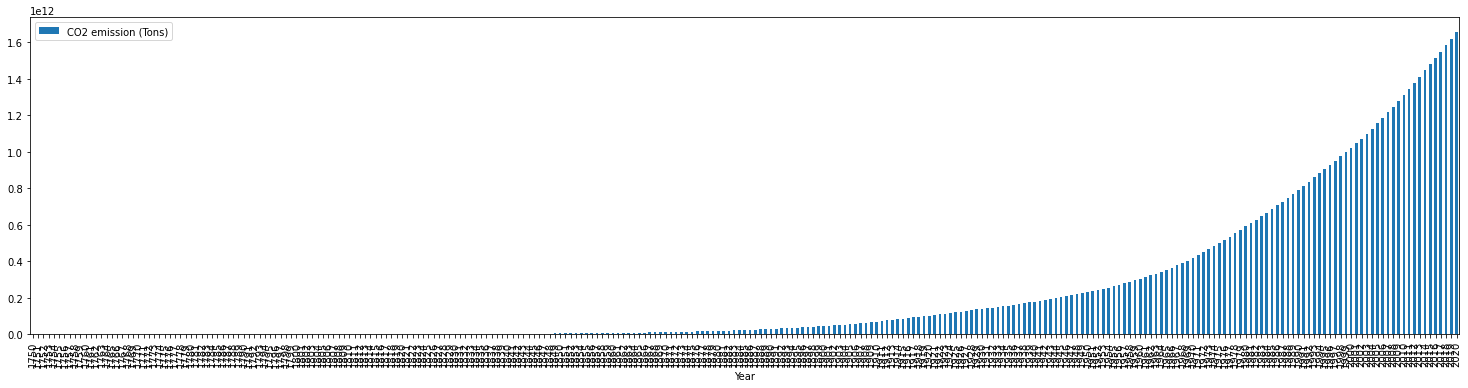

In [ ]:
#Barplots
yearly_average = pd.DataFrame(data.groupby('Year')['CO2 emission (Tons)'].sum())
yearly_average

yearly_average.plot(kind='bar')
